<a href="https://colab.research.google.com/github/utk468/brain_tumor/blob/main/brain_tumor2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import kagglehub
sartajbhuvaji_brain_tumor_classification_mri_path = kagglehub.dataset_download('sartajbhuvaji/brain-tumor-classification-mri')

print('Data source import complete.')


In [ ]:
import kagglehub


path = kagglehub.dataset_download("sartajbhuvaji/brain-tumor-classification-mri")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/brain-tumor-classification-mri


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.regularizers import l2

In [ ]:
train_dir = "/kaggle/input/brain-tumor-classification-mri/Training"
test_dir = "/kaggle/input/brain-tumor-classification-mri/Testing"

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
test_datagen = ImageDataGenerator(
    rescale=1.0 / 255
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
base_model.trainable = False

In [ ]:

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [ ]:
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-7
)


In [ ]:
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=test_generator,
    callbacks=[early_stopping, lr_scheduler]
)


loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy:.2f}")

Epoch 1/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 33s 337ms/step - accuracy: 0.7988 - loss: 2.1421 - val_accuracy: 0.5812 - val_loss: 3.0670 - learning_rate: 1.0000e-04
Epoch 2/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 32s 333ms/step - accuracy: 0.7962 - loss: 2.0876 - val_accuracy: 0.5990 - val_loss: 2.8765 - learning_rate: 1.0000e-04
Epoch 3/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 33s 335ms/step - accuracy: 0.8094 - loss: 2.0179 - val_accuracy: 0.6041 - val_loss: 2.7719 - learning_rate: 1.0000e-04
Epoch 4/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 33s 335ms/step - accuracy: 0.8245 - loss: 1.8937 - val_accuracy: 0.6041 - val_loss: 2.6949 - learning_rate: 1.0000e-04
Epoch 5/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 33s 336ms/step - accuracy: 0.8240 - loss: 1.8530 - val_accuracy: 0.6041 - val_loss: 2.7084 - learning_rate: 1.0000e-04
Epoch 6/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 33s 336ms/step - accuracy: 0.8167 - loss: 1.8252 - val_accuracy: 0.6041 - val_loss: 2.7236 - learning_rate: 1.0000e-04
Epoch 7/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 33s 334ms/step - acc

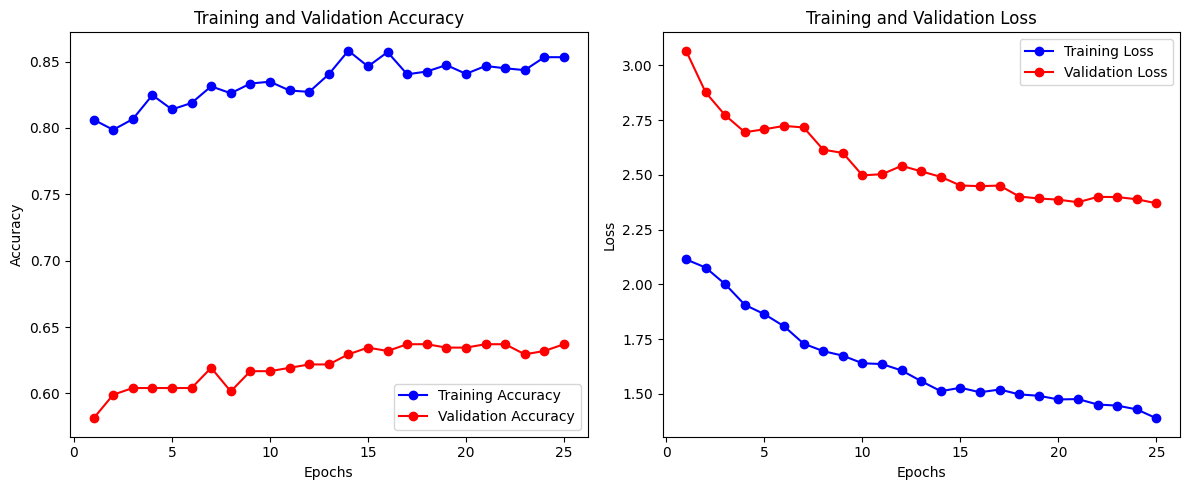

In [ ]:
import matplotlib.pyplot as plt


train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(1, len(train_accuracy) + 1)


plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.tight_layout()
plt.show()